In [1]:
#Import Packages
import ROOT as r
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import uproot
import pickle
import numpy as np


Welcome to JupyROOT 6.22/06


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-dq2_nuzt because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [2]:
##Open the ROOT file
#file = "HallC_beamtest_even_gamma_18deg_10GeV_filenum100_1e6_reduce_tree_rate_tid1.root"
#file = "HallC_beamtest_even_e_18deg_10GeV_filenum100_1e6_reduce_tree_rate_tid1.root"
#file = "HallC_beamtest_even_pim_18deg_10GeV_filenum100_1e6_reduce_tree_rate_tid1.root"
#file = "HallC_beamtest_BeamOnTarget_1.9988e9_10uA_18deg_r20m_LD2_shielding_30x30x2.54cm3_reduce_tree_rate.root"

file = "HallC_beamtest_beamOntarget_40uA_sangle_4SC_18deg_LD2_10xdensity_r20m_shielding_30x30x2.54cm3_poly_1.9999e9_reduce_tree_rate.root"

path = "/volatile/halla/solid/tianye/container/HallC_beamtest_18deg_simulation_files/"

datafile = f"{path}/{file}"


tfile=r.TFile(datafile)
tfile.ls()

TFile**		/volatile/halla/solid/tianye/container/HallC_beamtest_18deg_simulation_files//HallC_beamtest_beamOntarget_40uA_sangle_4SC_18deg_LD2_10xdensity_r20m_shielding_30x30x2.54cm3_poly_1.9999e9_reduce_tree_rate.root	
 TFile*		/volatile/halla/solid/tianye/container/HallC_beamtest_18deg_simulation_files//HallC_beamtest_beamOntarget_40uA_sangle_4SC_18deg_LD2_10xdensity_r20m_shielding_30x30x2.54cm3_poly_1.9999e9_reduce_tree_rate.root	
  KEY: TTree	T;1	HallC beam test simulation tree


In [3]:
%%time
# Read out the data as a dictionary of numpy arrays
df = r.RDataFrame('T;1', datafile)
#df2 = r.RDataFrame('T;8', datafile)
print("RDataFrame")

df_filter = df#.Filter("ShowerSum > 0")
#df_filter2 = df2#.Filter("ShowerSum > 0")
print("Filtered")

data = df_filter.AsNumpy()
#data2 = df_filter2.AsNumpy()
print("NumPy")

data_df = pd.DataFrame.from_dict(data)
#data_df2 = pd.DataFrame.from_dict(data2)
print("Pandas")

full_data_df = (data_df)#.append(data_df2,ignore_index=1))#.drop_duplicates()

RDataFrame
Filtered
NumPy
Pandas
CPU times: user 6.27 s, sys: 464 ms, total: 6.73 s
Wall time: 6.68 s


In [4]:
full_data_df#.head()

,rate,vx,vy,vz,px,py,pz,p,pid,PreShP,...,GEM11_x,GEM11_y,GEM11_vy,GEM11_vx,GEM11_Edep,GEM11_Edep2,GEM11_Edep3,GEM11_Etot,Npesum,Cer
0,125006.25,-0.135374,-0.015597,-40.0,0.0,0.0,10.6,10.6,11,2.450975,...,[],[],[],[],0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,125006.25,-0.004890,0.240873,-40.0,0.0,0.0,10.6,10.6,11,23.509928,...,[2.899559497833252],[4.30232048034668],[4.30232048034668],[-669.8673095703125],0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,125006.25,0.162712,-0.052963,-40.0,0.0,0.0,10.6,10.6,11,14.994902,...,[],[],[],[],0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,125006.25,-0.212917,-0.123911,-40.0,0.0,0.0,10.6,10.6,11,5.808122,...,[],[],[],[],0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,125006.25,0.044975,-0.112659,-40.0,0.0,0.0,10.6,10.6,11,0.687016,...,[],[],[],[],0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150915,125006.25,-0.178486,0.015236,-40.0,0.0,0.0,10.6,10.6,11,0.514791,...,[],[],[],[],0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
150916,125006.25,0.186190,0.103504,-40.0,0.0,0.0,10.6,10.6,11,0.123054,...,[],[],[],[],0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
150917,125006.25,0.189801,0.092727,-40.0,0.0,0.0,10.6,10.6,11,0.068261,...,[],[],[],[],0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
150918,125006.25,0.079326,0.037564,-40.0,0.0,0.0,10.6,10.6,11,0.192211,...,[],[],[],[],0.0,0.0,0.0,0.0,0.0,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [6]:
name = "e"#"BeamOnTarget"
full_data_df.to_pickle(f"SavedSim_Pencil/{name}_tid1.pkl")

## Method 2

In [13]:
%%time
#file = "HallC_beamtest_even_pim_18deg_10GeV_filenum100_1e6_reduce_tree_rate_tid1.root"
file = "HallC_beamtest_beamOntarget_40uA_sangle_4SC_18deg_LD2_10xdensity_r20m_shielding_30x30x2.54cm3_poly_1.9999e9_reduce_tree_rate.root"

path = "/volatile/halla/solid/tianye/container/HallC_beamtest_18deg_simulation_files/"

datafile = f"{path}/{file}"

upfile = uproot.open(datafile)
upfile.keys()

test_array = upfile.arrays(library="np")#, entry_start=0,entry_stop=1e6)
#test_array

AttributeError: 'ReadOnlyDirectory' object has no attribute 'arrays'

In [17]:
upfile["T;1"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
rate                 | float                    | AsDtype('>f4')
vx                   | float                    | AsDtype('>f4')
vy                   | float                    | AsDtype('>f4')
vz                   | float                    | AsDtype('>f4')
px                   | float                    | AsDtype('>f4')
py                   | float                    | AsDtype('>f4')
pz                   | float                    | AsDtype('>f4')
p                    | float                    | AsDtype('>f4')
pid                  | int32_t                  | AsDtype('>i4')
PreShP               | float                    | AsDtype('>f4')
PreShP_e             | float                    | AsDtype('>f4')
PreShPx              | float                    | AsDtype('>f4')
PreShPy              | float                    | AsDtype(

In [18]:
len(test_array["ShowerSum"])

150920

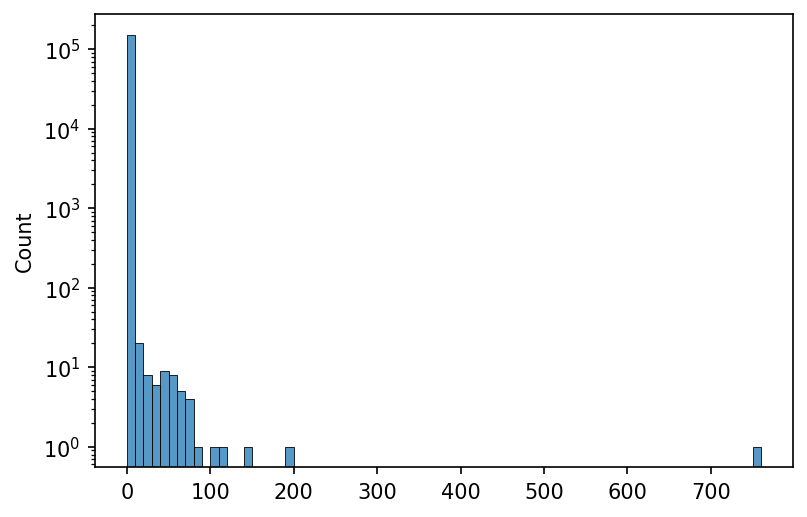

In [12]:
fig = plt.figure(dpi=150)
sns.histplot(test_array["ShowerSum"],binwidth=10)
plt.yscale("log")